In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import scipy 
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv', index_col='Id')

In [3]:
def fill_na(df, feature):       # filling null values based on current distribution
    s = df[feature].value_counts(normalize=True)
    missing = df[feature].isnull()
    df.loc[missing,feature] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [4]:
def prep(df):
    df.MSZoning.fillna('RL',inplace=True)  # mode of this feature is 'RL' , hence filling with this
    df.drop(['Alley'],axis=1,inplace=True) # many are null values, won't be useful
    df.drop(['PoolArea'],axis=1,inplace=True) # 1453/1460 are 0's
    df.MSSubClass.fillna(df.MSSubClass.mean())
    for i in df.columns:
        fill_na(df,i)
        
    df['Bath'] = df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']
    df['Porch'] = df['OpenPorchSF'] + df['3SsnPorch']  + df['ScreenPorch']
    df.drop(['OpenPorchSF','3SsnPorch','ScreenPorch'],axis=1,inplace=True)
    df['GarageYear'] = pd.cut(x=df['GarageYrBlt'], bins=[1900, 1920, 1945, 1980, 1993, 2002, 2010], labels=[0, 1, 2, 3, 4, 5])
    df['HouseYear'] = pd.cut(x=df['YearBuilt'], bins=[1872, 1910, 1950, 1980, 1990, 2002, 2010], labels=[0, 1, 2, 3, 4, 5])
    df.drop(['FullBath', 'HalfBath','BsmtFullBath','BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'YearBuilt'],axis=1,inplace=True)
    df['BsmtFinSF'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'])/2
    df.drop(['BsmtFinSF1', 'BsmtFinSF2'],axis=1,inplace=True)

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

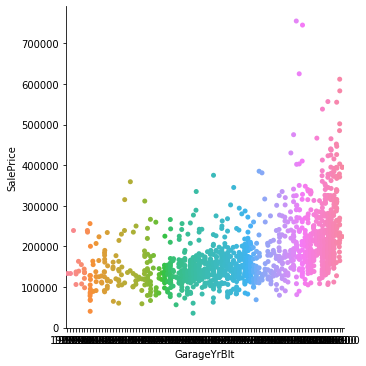

In [127]:
sns.catplot(x='GarageYrBlt',y='SalePrice',data=df)
df.GarageYrBlt.describe() 
#making bins for Garage Year Built

In [129]:
dfdf..value_counts()
# df.LotShape.fillna(df.LotConfig.mode(),inplace=True)
# plt.bar(df.LotConfig,df.SalePrice)

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

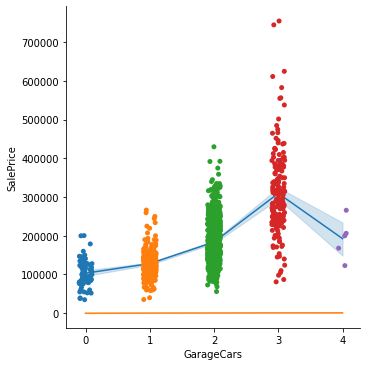

In [139]:
sns.catplot(x='GarageCars',y='SalePrice',data=df)
sns.lineplot(x='GarageCars',y='SalePrice',data=df)
sns.lineplot(x='GarageCars',y='GarageArea',data=df)
#dropping Garage Area and will use Garage Cars for the same, as both represent the same thing

In [155]:
df['Porch'] = df['OpenPorchSF'] + df['3SsnPorch']  + df['ScreenPorch']

In [187]:
from sklearn.linear_model import LinearRegression
sub = df[['OpenPorchSF', '3SsnPorch','ScreenPorch','EnclosedPorch']]
m1 = LinearRegression().fit(sub,df.SalePrice)
m1.score(sub,df.SalePrice)
coef = m1.coef_
inter = m1.intercept_

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

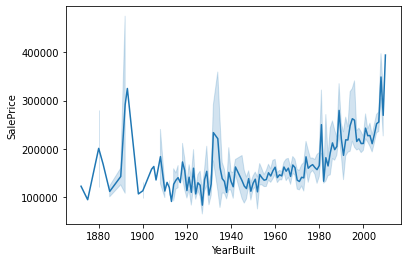

In [201]:
# sns.catplot(x='YearBuilt',y='SalePrice',data=df)
sns.lineplot(x='YearBuilt',y='SalePrice',data=df)
# sns.lineplot(x='YearBuilt',y='GarageArea',data=df)/
df['HouseYear'] = pd.cut(x=df['YearBuilt'], bins=[1872, 1910, 1950, 1980, 1990, 2002, 2010], labels=[0, 1, 2, 3, 4, 5])

In [213]:
df.corr().OverallCond # we can consider dropping this,, less correlation with Sale Price

MSSubClass      -0.059316
LotFrontage     -0.059213
LotArea         -0.005636
OverallQual     -0.091932
OverallCond      1.000000
YearBuilt       -0.375983
YearRemodAdd     0.073741
MasVnrArea      -0.128101
BsmtFinSF1      -0.046231
BsmtFinSF2       0.040229
BsmtUnfSF       -0.136841
TotalBsmtSF     -0.171098
1stFlrSF        -0.144203
2ndFlrSF         0.028942
LowQualFinSF     0.025494
GrLivArea       -0.079686
BsmtFullBath    -0.054942
BsmtHalfBath     0.117821
FullBath        -0.194149
HalfBath        -0.060769
BedroomAbvGr     0.012980
KitchenAbvGr    -0.087001
TotRmsAbvGrd    -0.057583
Fireplaces      -0.023820
GarageYrBlt     -0.324297
GarageCars      -0.185758
GarageArea      -0.151521
WoodDeckSF      -0.003334
OpenPorchSF     -0.032589
EnclosedPorch    0.070356
3SsnPorch        0.025504
ScreenPorch      0.054811
PoolArea        -0.001985
MiscVal          0.068777
MoSold          -0.003511
YrSold           0.043950
SalePrice       -0.077856
Porch            0.017550
Name: Overal

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

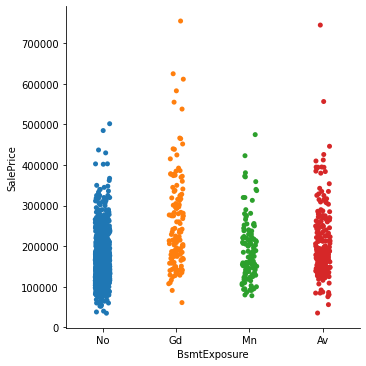

In [227]:
sns.catplot(x='BsmtExposure',y='SalePrice',data=df) # we can drop this
df.BsmtExposure.value_counts()

In [236]:
df['BsmtFinSF'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'])/2
df.drop(['BsmtFinSF1', 'BsmtFinSF2'],axis=1,inplace=True)

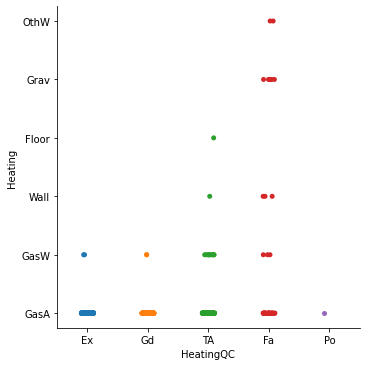

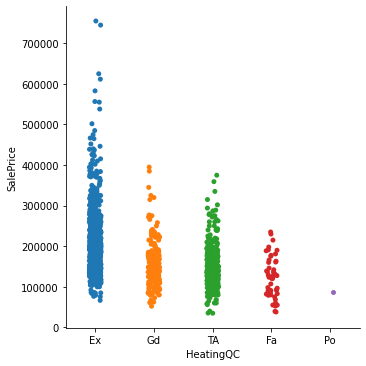

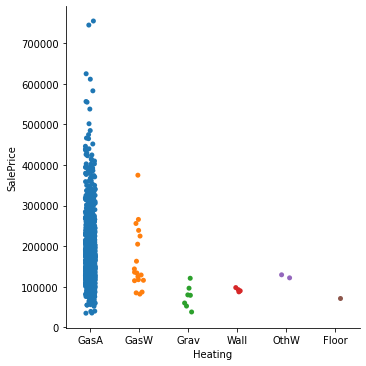

In [247]:
sns.catplot(x='HeatingQC',y='Heating',data=df)
sns.catplot(x='HeatingQC',y='SalePrice',data=df)
sns.catplot(x='Heating',y='SalePrice',data=df)

In [5]:
# from sklearn.ensemble import RandomForestRegressor
# regr = RandomForestRegressor(max_depth=2, random_state=0)
prep(df)
# y = df['SalePrice']
# df.drop(['SalePrice'],axis=1,inplace=True)
# regr.fit(df, y)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   LotShape       1460 non-null   object  
 6   LandContour    1460 non-null   object  
 7   Utilities      1460 non-null   object  
 8   LotConfig      1460 non-null   object  
 9   LandSlope      1460 non-null   object  
 10  Neighborhood   1460 non-null   object  
 11  Condition1     1460 non-null   object  
 12  Condition2     1460 non-null   object  
 13  BldgType       1460 non-null   object  
 14  HouseStyle     1460 non-null   object  
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearRemodAdd   1460 non-null   in

In [9]:
for i in df.columns:
        fill_na(df,i)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   LotShape       1460 non-null   object  
 6   LandContour    1460 non-null   object  
 7   Utilities      1460 non-null   object  
 8   LotConfig      1460 non-null   object  
 9   LandSlope      1460 non-null   object  
 10  Neighborhood   1460 non-null   object  
 11  Condition1     1460 non-null   object  
 12  Condition2     1460 non-null   object  
 13  BldgType       1460 non-null   object  
 14  HouseStyle     1460 non-null   object  
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearRemodAdd   1460 non-null   in

In [11]:
# ordinal  encoding on features that require that treatment, and on rest label encoding , using for loop.